# GUIDE to Worksheet 2.3

This notebook is meant to provide hints and guidance on how to complete Worksheet 2.3: Bootstrapping linear regression.  It will not necessarily answer every part of every problem, but it will get you to the interesting points of the worksheet.

Also, these guides may be useful for you as you are building up your coding toolkit to see different ways to execute different tasks in Python. I am not necessarily showing the most efficient or elegant code, but trying to illustrate different ways to do things.  You should always use the code you feel you can understand best.

---

First, let's take care of our imported modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn.linear_model import LinearRegression as skLinReg

sns.set(color_codes=True)

%matplotlib inline

In this worksheet, you will be working with the [linked data set](https://github.com/ejohnson643/WhatDoYourDataSay/blob/main/CourseFiles/Module_2/Resources/auto-mpg.data), which is described [here](https://github.com/ejohnson643/WhatDoYourDataSay/blob/main/CourseFiles/Module_2/Resources/auto-mpg.names).

We will be performing estimation of the model parameters $\beta_0$, $\beta_3$, and $\beta_6$ in the model:
\begin{equation}
x_0 = \beta_0 + \beta_3x_3 + \beta_6x_6
\end{equation}

That is, we think that the first measurement in each observation depends linearly on the **4th** and **7th**.  It will be up to you to use the metadata to learn what these measurements are.

At the end of this worksheet, you should have a figure that shows the model, the data, the parameter estimates, and the spread in those parameter estimates.  This can be one panel or many, but it should be one easy-to-understand figure that has all of those components.

## Part 1

Use the `open` and `file.readlines` functions to open the data set.  How does it seem that the measurements in each line of the data are organized?  What type of data are the lines?  How can we `split` the lines and grab the measurements we want (1st, 4th, and 7th columns)?  How can we do this repeatedly for all lines of the data?  You may also have to check the data for missing or invalid values!

---

Let's first try and open the data and see what we're dealing with. The first thing we can try, although it's not always useful, is to simply use `open` and `file.readlines` or `file.read` to see everything in raw ascii.

In [2]:
mpgData = "auto-mpg.data"
mpgNames = "auto-mpg.names"

with open("./Resources/" + mpgNames, 'r') as f:
    print(f.read())  ## Try f.readlines() and see what happens!

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

We can see that the `auto-mpg.names` file contains a description of the data set!  This means that the model we want to explore is the linear relationship between horsepower and model year and mpg.

Let's look at the `auto-mpg.data` now.

In [3]:
with open("./Resources/" + mpgData, 'r') as f:
    print(f.read())

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"
15.0   8   383.0      170.0      3563.      10.0   70  1	"dodge challenger se"
14.0   8   340.0      160.0      3609.       8.0   70  1	"plymouth 'cuda 340"
15.0   8   400.0      150.0      3761.       9.5   70  1	"chevrolet monte ca

We can see that the data seem to be regularly ordered columns of data, each corresponding to the attributes described in `auto-mpg.names`.

So how can we extract these columns separately?  One way is to manually use string operations to process each line.  The loop below shows how one might go about this.  I've left in the `print` and `break` statements I used to debug while doing this process.

In [4]:
autoData = []
with open("./Resources/" + mpgData, "r") as f:
    tmpData = f.readlines()
    
    for row in tmpData:
        row = row.strip().split("\t")
#         print(row)  ## Once I confirmed that the above function worked
#         break       ## to remove the "\t" and "\n" I moved on.
        newRow = []
        for el in row: ## We now have two elements in the row
                       ## And we want to get rid of the spaces.
            newRow.append(el.split(" "))
#         print(newRow) ## Looking at the output, we see that we split
#         break         ## the string containing the name of the car
#                       ## so let's try something else.
    
        ## We know that we want to keep the car name intact,
        ## so only split the first string.
        newRow = row[0].split(" ") + [row[1]]
#         print(newRow) ## Checking the work...
#         break
        
        ## Let's get rid of the empty elements and convert the numbers
        row = []
        for el in newRow[:-1]:
            if len(el) > 0:
                if el != "?": ## It turns out this data set has missing
                              ## values coded as "?"... That's annoying!
                    row.append(float(el))
                else:
                    row.append(np.nan)  ## The `np.nan` stands for "Not
                                        ## a number" and is a float that
                                        ## stands for missing values.
        row.append(newRow[-1])
#         print(row) ## Checking the work...
#         break
        
        autoData.append(row)

print(autoData[0])

[18.0, 8.0, 307.0, 130.0, 3504.0, 12.0, 70.0, 1.0, '"chevrolet chevelle malibu"']


As an alternative, we might also want to try and use loader functions like `np.loadtxt` or `pandas.read_csv`.  Unfortunately, this data was stored in a manner that will stymie the `np.loadtxt` function, however the more sophisticated function from `pandas` can get the job done with a bit of tweaking.

In [5]:
import pandas as pd

colNames = ['mpg', 'cylinders', 'displacement', 'horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'car_name']

autoDF = pd.read_csv("./Resources/" + mpgData,
                     delim_whitespace=True,
                     na_values=["?"],
                     names=colNames)
autoDF.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

Of course all of this was a bit of overkill as we really were only asked to consider the 1st, 4th, and 7th observations. We now know that these are `mpg`, `horsepower` and `model_year`. We can extract these from either our manually loaded data (which is a list of lists) or from the `pandas` DataFrame.

In [6]:
data = []

for ii, row in enumerate(autoData):
    newRow = [row[0], row[3], row[6]]
    if np.nan not in newRow: ## Only add in complete data.
        data.append(newRow)

data = np.array(data)

print(f"'{mpgData}' has been loaded and columns extracted.  Shape =",
      data.shape)

## Alternately, we can extract from the pandas DataFrame
## We use the `dropna` function to drop the missing data and the `values`
## attribute to return the output as an array.
data = autoDF[[colNames[0], colNames[3], colNames[6]]].dropna().values

print(f"'{mpgData}' has been loaded and columns extracted.  Shape =",
      data.shape)
print(f"After `values` the type of the data is {type(data)}")

'auto-mpg.data' has been loaded and columns extracted.  Shape = (392, 3)
'auto-mpg.data' has been loaded and columns extracted.  Shape = (392, 3)
After `values` the type of the data is <class 'numpy.ndarray'>


## Part 2.
Report the number of samples in your data set, save it as $N$, and calculate the mean, median, standard deviation, and IQR (inter-quartile range) of each of the measurements in the data set.

---

You should be somewhat comfortable with these processes at this point, so instead I am going to illustrate what this might look like if we kept using the DataFrame structure.

In [7]:
dataDF = autoDF[[colNames[0], colNames[3], colNames[6]]].dropna()

dataDF.describe()

mpg  horsepower  model_year
count  392.000000  392.000000  392.000000
mean    23.445918  104.469388   75.979592
std      7.805007   38.491160    3.683737
min      9.000000   46.000000   70.000000
25%     17.000000   75.000000   73.000000
50%     22.750000   93.500000   76.000000
75%     29.000000  126.000000   79.000000
max     46.600000  230.000000   82.000000

## Part 3.

Use appropriate plots to show how the different quantities depend on each other.  If you loaded the data as a `pandas.DataFrame`, try using the `sns.pairplot` command.  Does it seem that the variables depend on each other *linearly*?

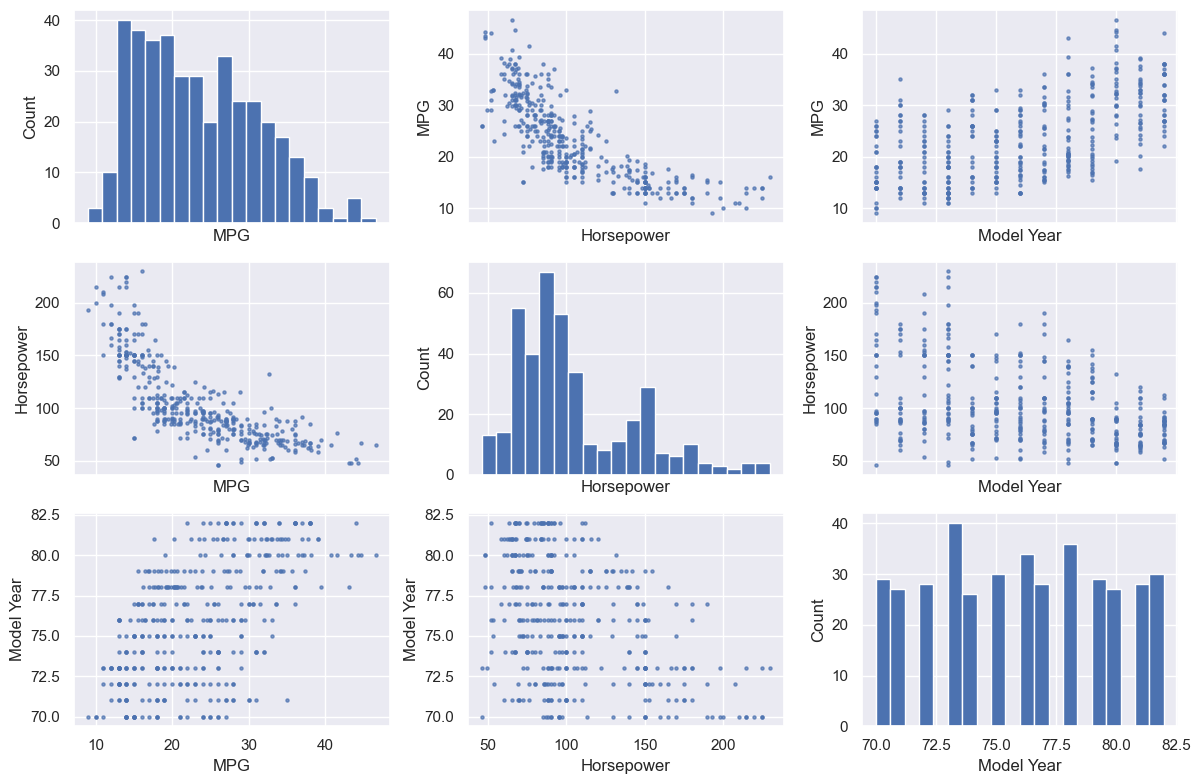

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8), sharex="col")

_ = axes[0, 0].hist(dataDF.mpg.values, bins=20)

_ = axes[0, 1].scatter(dataDF.horsepower, dataDF.mpg, s=5, alpha=0.7)

_ = axes[0, 2].scatter(dataDF.model_year, dataDF.mpg, s=5, alpha=0.7)


_ = axes[1, 1].hist(dataDF.horsepower.values, bins=20)

_ = axes[1, 0].scatter(dataDF.mpg, dataDF.horsepower, s=5, alpha=0.7)

_ = axes[1, 2].scatter(dataDF.model_year, dataDF.horsepower, s=5, alpha=0.7)


_ = axes[2, 2].hist(dataDF.model_year.values, bins=20)

_ = axes[2, 0].scatter(dataDF.mpg, dataDF.model_year, s=5, alpha=0.7)

_ = axes[2, 1].scatter(dataDF.horsepower, dataDF.model_year, s=5, alpha=0.7)

for ii in range(3):
    _ = axes[ii, 0].set_xlabel("MPG")
    _ = axes[ii, 1].set_xlabel("Horsepower")
    _ = axes[ii, 2].set_xlabel("Model Year")
    
    _ = axes[0, ii].set_ylabel("MPG")
    _ = axes[1, ii].set_ylabel("Horsepower")
    _ = axes[2, ii].set_ylabel("Model Year")
    
    _ = axes[ii, ii].set_ylabel("Count")
    
_ = fig.tight_layout()

## Part 4.

Use your preferred linear regression package to fit the model.  What are the values of $\beta_0$, $\beta_3$, and $\beta_6$?  If you're using a package that returns this information, what is the confidence interval for each of the regression coefficients?

---

We're going to make use of the `sklearn.linear_model.LinearRegression` object because we want to do regression with multiple covariates and to show how we can calculate confidence intervals manually.

In [9]:
X = data[:, 1:]
Y = data[:, 0].reshape(-1, 1)

model = skLinReg()
_ = model.fit(X, Y)

print(f"The fitted model is: `MPG` = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f} `HP` + {model.coef_[0][1]:.2f} `YEAR`")

The fitted model is: `MPG` = -12.74 + -0.13 `HP` + 0.66 `YEAR`


To get the standard errors in the coefficients, which we need to calculate our MLE confidence intervals, we are going to make use of the fact that the covariance matrix can be calculated as $\Sigma = \sigma^2(X^TX)^{-1}$, where $\sigma^2$ is the variance of the Gaussian noise.  Unfortunately, we don't know $\sigma^2$ *a priori*, so we have to estimate it using the sample variance, $\hat{\sigma}^2 = \frac{\text{SSR}}{\text{DoF}}$, where SSR is the sum of the squared residuals and DoF is the degrees of freedom in the data. In this case it is $\text{DoF} = N - P - 1 = 389$, where $N$ is the number of samples (rows in the data) and $P$ is the number of covariates (columns in the data).

In [10]:
Y_pred = model.predict(data[:, 1:])
resids = Y - Y_pred
SSR = np.sum(resids ** 2)

N, P = X.shape
sigmaHat = SSR / (N - P - 1)

We then want to calculate $\hat{\Sigma} = \hat{\sigma}^2(X^TX)^{-1}$, which we can do after adjusting the covariate matrix a bit.  Note here we're making use of the builtin **matrix multiplication** operator `@` and the `np.linalg` package, which is designed to do basic linear algebra operations.  The standard errors are then the square roots of the diagonal elements of the covariance matrix.

In [11]:
## We need to add a constant column for the intercept term
X_adj = np.ones((N, P + 1))
X_adj[:, 1:] = X
covarHat = np.linalg.inv(X_adj.T @ X_adj) * sigmaHat

stdErrs = np.diag(covarHat) ** 0.5

print(f"The standard error in the intercept estimate is: {stdErrs[0]:.4g}")
print(f"The standard error in the beta_4 estimate is: {stdErrs[1]:.4g}")
print(f"The standard error in the beta_7 estimate is: {stdErrs[2]:.4g}")

The standard error in the intercept estimate is: 5.349
The standard error in the beta_4 estimate is: 0.006341
The standard error in the beta_7 estimate is: 0.06626


We can compare this to the output from `statsmodels` to check our work.

In [12]:
import statsmodels.api as sm

smModel = sm.OLS(Y, X_adj)
smResult = smModel.fit()

print(smResult.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     423.9
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.94e-98
Time:                        18:32:50   Log-Likelihood:                -1134.5
No. Observations:                 392   AIC:                             2275.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7392      5.349     -2.382      0.0

Finally we can calculate the confidence intervals using the formula
\begin{equation}
CI_{\beta} = \hat{\beta} \pm t_{\alpha/2, \nu}\hat{\sigma}_{\beta},
\end{equation}
where $t_{p, \nu}$ is the $p^{\text{th}}$ percentile of the $t$ distribution with $\nu$ degrees of freedom, $\hat{\beta}$ is our ML estimate for the regression coefficient, and $\hat{\sigma}_{\beta}$ is the estimated standard error in the regression coefficient.  Implementing this formula, we get:

In [13]:
betas = np.hstack((model.intercept_, model.coef_[0]))  ## hstack "stacks" arrays "H"orizontally
                                                       ## (there's also a np.vstack)
alpha = 0.05
dof = N - P - 1
t_alpha = st.t.ppf(alpha/2, dof)

CI_beta = np.zeros((3, 2))
CI_beta[:, 0] = betas + t_alpha * stdErrs
CI_beta[:, 1] = betas - t_alpha * stdErrs

for ii, number in enumerate([0, 3, 6]):
    print(f"Our estimate for beta_{number} is {betas[ii]:.4g}\t({CI_beta[ii, 0]:.4g}, {CI_beta[ii, 1]:.4g})")

Our estimate for beta_0 is -12.74	(-23.26, -2.223)
Our estimate for beta_3 is -0.1317	(-0.1441, -0.1192)
Our estimate for beta_6 is 0.6573	(0.527, 0.7875)


## Part 5.

Generate a new set of $N$ samples by bootstrapping your data set with replacement.  Run linear regression on this new sample and report the regression coefficients.

----

Importantly here we don't want to shuffle columns independently, we want to resample the *rows* of the original data.  This means that we want to draw *row indices* with replacement.  We'll do this easily with the `np.random.randint` function.

Looking ahead, we're going to do this bootstrapping many times, so I'm going to wrap it all in a nice function.

In [14]:
def bootLinReg(X, Y, verbose=False):
    
    N, P = X.shape
    P = P + 1
    
    newIdx = np.random.randint(N, size=(N))
    
    newX, newY = X[newIdx], Y[newIdx]
    
    if verbose:
        print(f"The shape of the resampled data is {newX.shape}")
    
    model = skLinReg(fit_intercept=False)
    _ = model.fit(newX, newY)
    
    return model

Y = Y.reshape(-1, 1)
X_adj = np.ones((N, P + 1))
X_adj[:, 1:] = X

bootModel = bootLinReg(X_adj, Y, verbose=True)

beta_0, beta_4, beta_7 = bootModel.coef_[0]

print(f"The fitted model is: `MPG` = {beta_0:.2f} + {beta_4:.2f} `HP` + {beta_7:.2f} `YEAR`")

The shape of the resampled data is (392, 3)
The fitted model is: `MPG` = -8.40 + -0.13 `HP` + 0.58 `YEAR`


## Part 6.

Do the previous step $N_{BOOT}$ times, where $N_{BOOT}$ is a suitably large number.  Present the *distributions* of regression coefficients.  Calculate the 2.5th and 97.5th percentiles of each coefficient.  If you found a confidence interval earlier, compare it to these percentiles.  Plot the point estimates (part 4) of the regression from the data on these distributions; are they near the median, mean, or mode of the distributions?

In [15]:
N_boot = 10000

Y = data[:, 0].reshape(-1, 1)
X_adj = np.ones((N, P + 1))
X_adj[:, 1:] = data[:, 1:]

betaBoot = np.zeros((N_boot, 3))

for ii in range(N_boot):
    
    bootModel = bootLinReg(X_adj, Y)
    
    betaBoot[ii] = bootModel.coef_[0]

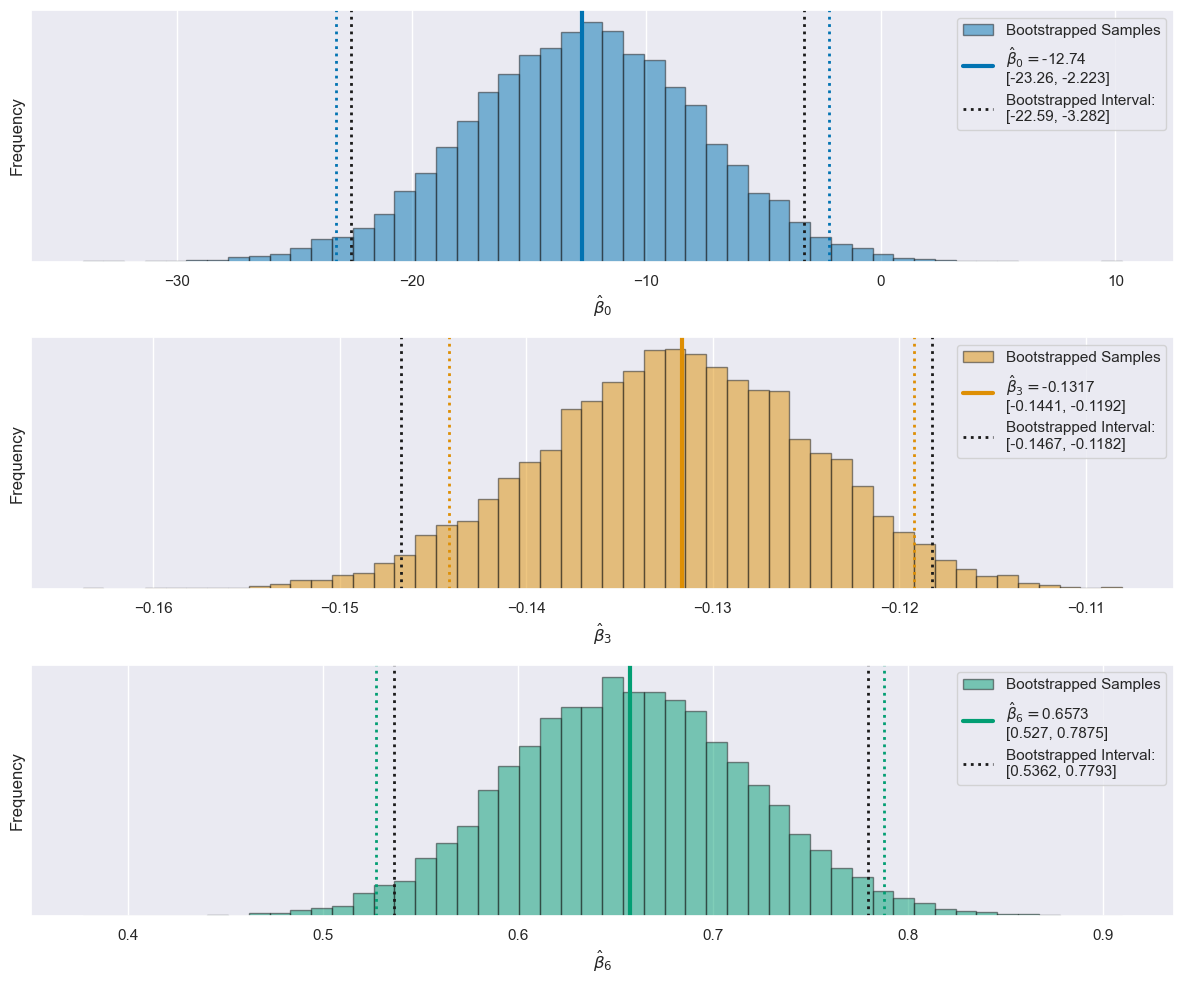

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

cblind = sns.color_palette('colorblind')

for ii, number in enumerate([0, 3, 6]):
    ax = axes[ii]
    bins = np.linspace(betaBoot[:, ii].min(), betaBoot[:, ii].max(), 51)
    _ = ax.hist(betaBoot[:, ii], bins=bins, color=cblind[ii], edgecolor='k', alpha=0.5,
                 label='Bootstrapped Samples')
    est_label  = r"$\hat{\beta}_" + f"{number}" + r" = $"
    est_label += f"{betas[ii]:.4g}\n[{CI_beta[ii, 0]:.4g}, {CI_beta[ii, 1]:.4g}]"
    _ = ax.axvline(betas[ii], color=cblind[ii], lw=3,
                    label=est_label)
    _ = ax.axvline(CI_beta[ii, 0], color=cblind[ii], lw=2, linestyle=':')
    _ = ax.axvline(CI_beta[ii, 1], color=cblind[ii], lw=2, linestyle=':')
    
    boot_CI = np.percentile(betaBoot[:, ii], [alpha / 2 * 100, (1 - alpha/2) * 100])
    
    boot_label = f"Bootstrapped Interval:\n[{boot_CI[0]:.4g}, {boot_CI[1]:.4g}]"
    _ = ax.axvline(boot_CI[0], color='k', lw=2, linestyle=":", label=boot_label)
    _ = ax.axvline(boot_CI[1], color='k', lw=2, linestyle=":")
    
    _ = ax.legend()
    
    _ = ax.set_xlabel(r"$\hat{\beta}_" + f"{number}" + r"$")
    _ = ax.set_ylabel("Frequency")
    _ = ax.set_yticks([])

_ = fig.tight_layout()